# 경사하강법(Gradient Descent)

- 함수 기울기를 낮은 쪽으로 계속 이동시켜 오차가 극값에 도달할때가지 반복

- cost를 최소화하기위해 매개변수를 반복적으로 조정

과정

1. 가중치(weight)에 대한 시작값 선택
2. Cost function(오차, error) 계산
3. Weight 업데이트
4. 반복



Learning rate 
- 어느 정도의 크기로 기울기가 줄어드는 지점으로 이동하겠는가를 나타내는 지표

learning rate 작을때
- step의 간격이 매우 작음 
- 학습을 하는 과정에 속도가 매우 느림 
- 만약 data를 학습하는 과정의 반복이 적을 경우 최솟값에 도달하기도 전에 학습이 끝나서 원하는 최솟값을 가질 수 없음




learning rate 클떄
- step의 간격이 매우 큼 
- 출발에는 기울기가 줄어드는 지점으로 이동을 하겠지만 어느 지점에서 최솟값에 도달하기 보다는 그래프의 반대편으로 지점이 이동
- step의 간격이 너무 커서 발생하는 결과 
- 이러한 차이가 계속 발생하게 되면 오히려 최솟값에 도달하기 보다는 그래프를 벗어나는 결과 값을 가지게 만듦
- 이러한 경우를 overshooting 이라고함


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('ggplot')

In [ ]:
# 경사하강법 예
# 입력값
X = np.array([1,2, 3], dtype = 'float32')

# 진짜 값
y = np.array([2, 2.5, 3.5], dtype = 'float32')

# 가중치(weight) , 편향(bias)
w = 2
b = 1

In [ ]:
# Cost = ((찐 -오차) ** 2  / 데이터 수)  합
# 예측값(hypothesis) = X * w + b
# -> cost가 최소가 되는 w,b구하기

# 예측 값
hypothesis = X * w + b
print(hypothesis)

# 진짜 
print(y)

# 오차 = 예측 - 진자 
hypothesis - y

[3. 5. 7.]
[2.  2.5 3.5]


array([1. , 2.5, 3.5], dtype=float32)

In [ ]:
# weight 기울기
# (예측 - 진짜) * X/ 데이터 수
# np.dot : 배열 끼리 곱
w_gred = 1/3*np.dot((hypothesis - y),X)
w_gred

# bias 기울기
# (예측 - 진짜)/ 데이터 수  의 합
b_gred = 1/3  * np.sum(hypothesis - y)

5.5

In [ ]:
X = np.array([1,2, 3], dtype = 'float32')

y = np.array([2, 2.5, 3.5], dtype = 'float32')

w,b = 2,1
learning_rate = 0.1

In [ ]:
# weight , bias 변화량이 너무큼
# 따라서 learning rate 사용
for i in range(100):
  print("w = ", w)
  print("b = ", b)
  hypothesis =  X*w + b

  print("hypothesis = ", hypothesis)
  print("y = ",y)

  cost = np.sum((hypothesis - y)**2)/3
  print("cost = ", cost)

  w_gred = (1/3 * np.dot((hypothesis - y), X)) * learning_rate
  print("w_gred = ", w_gred)
  w =  w - w_gred

  b_gred = (1/3 * np.sum(hypothesis - y)) * learning_rate
  print("b_gred ", b_gred)
  b = b- b_gred

  print("="*100)

(0.0, 4.0)

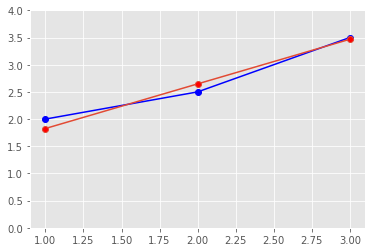

In [ ]:
# 시각화 
# 진짜
plt.plot(X, y, color = 'b',marker = 'o')

# 예측
plt.plot(X, hypothesis, mfc="r", ls="-", marker="o")
plt.ylim(0,4)

In [ ]:
print("X가 10일때 예측값 = ", w * 10 + b)
print("X가 20일때 예측값 = ", w * 20 + b)

X가 10일때 예측값 =  9.206279444694523


# 텐서플로우 1.x를 이용한 선형 회귀

In [24]:
% tensorflow_version 1.x

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [44]:
tf.__version__
tf.enable_eager_execution() # 텐서플로우 즉시 실행
plt.style.use('ggplot')

In [27]:
X = np.array([1, 2, 3], dtype = 'float32')
y = np.array([2, 2.5, 3.5], dtype = 'float32')

# Weight
W = tf.Variable([2], dtype = "float32") # [2] 변수 생성

# Bias
b = tf.Variable([1], dtype = 'float32') # [1] 변수 생성

# 학습률
learning_rate = 0.1

print("X :", X)
print("y :", y)
print("W :", W)
print("b :", b)

X : [1. 2. 3.]
y : [2.  2.5 3.5]
W : <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.], dtype=float32)>
b : <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>


컨텍스트 매니저 : context manager

- with 구문에 쓰일 수 있는 객체 타입
- 두개의 메소드를 정의함 
- __enter__(self) : with 문에 진입하는 시점에 자동 호출
- __exit__(self, type, value, traceback): with 문이 끝나기 직전에 자동 호출

In [ ]:
# 클래스 선언
class Hello:
  def __enter__(self):
    print("enter 함수 실행")
    
    return self
  
  def __exit__(self, exec_type, exc_val, exc_tb):
    print("exit 함수 실행")

# 호출
with Hello() as h:
  print("with 실행")

enter 함수 실행
with 실행
exit 함수 실행


In [ ]:
with tf.GradientTape() as Tape:
  print("with 실행")

with 실행


In [ ]:
# with tf.GradientTape() as tape: 
for i in range(100):
  print("i = ",i)
  print("W = ",W)
  print("b = ",b)

  with tf.GradientTape() as tape:
    hypothesis = W * X + b
    print("hypothesis = ", hypothesis)

    # tf.reduce_mean : 전체 평균
    # tf.square : 제곱
    cost = tf.reduce_mean(tf.square(hypothesis - y)) 
    print("cost =", cost)
    
# tape에 계산 과정을 기록해두었다가 tape.gradient를 이용해서 미분을 자동으로 구함
  W_grad, b_grad =  tape.gradient(cost, [W,b])
  print("W_grad =",W_grad)
  print("b_grad =",b_grad)

  # a.assign_sub(b) : a = a - b 
  W.assign_sub(W_grad * learning_rate) # W = W - W_grad * learning_rate
  b.assign_sub(b_grad * learning_rate) 
  print("update W_grad =",W_grad)
  print("update b_grad =",b_grad)
  print("="*100)

In [66]:
print("i = ",i)
print("W = ",W.numpy())
print("b = ",b.numpy())
print("cost = ",cost)

 i = 99
 W = [0.7500009]
 b = [1.1666646]
 cost = 0.01388890203088522



(0.0, 4.0)

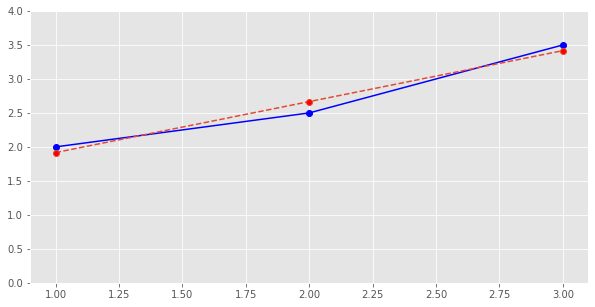

In [52]:
# 시각화
plt.figure(figsize=(10,5))
plt.plot(X, y, color = 'b', marker = 'o')
plt.plot(X, hypothesis.numpy(), mfc = 'r', ls = '--', marker = 'o')
plt.ylim(0,4)

In [56]:
# 예측
print("X가 10일 때 y = ", (W * 10 + b).numpy())
print("X가 20일 때 y = ", (W * 20 + b).numpy())

X가 10일 때 y =  [8.666674]
X가 20일 때 y =  [16.166683]


# 실습

## 30~62
- Gradient Descent를 이용한 선형 회귀 구현

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# 독립
X = np.array([1, 2, 3], dtype = 'float32')

# 종속
y = np.array([2, 2.5, 3.5], dtype = 'float32')

# 가중치
w = 2

# 편향
b = 1

# 예측값
hypothesis = X * w + b

# learning_rate
learning_rate = 0.1
print(f' X = {X}\n y = {y}\n b = {w}\n cost = {b}\n hypothesis = {hypothesis}')
print(" learning_rate:",learning_rate)

 X = [1. 2. 3.]
 y = [2.  2.5 3.5]
 b = 2
 cost = 1
 hypothesis = [3. 5. 7.]
 learning_rate: 0.1


(0.0, 8.0)

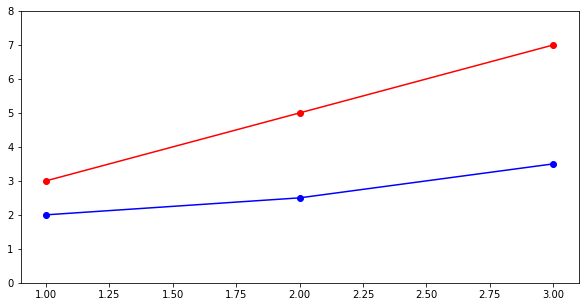

In [13]:
# 가중치와 편향이 2 와 1일때
# 오차 심함
plt.figure(figsize = (10, 5))
plt.plot(X,y , color = 'b', marker = 'o')
plt.plot(X,hypothesis , color = 'r', marker = 'o')
plt.ylim(0,8)

In [ ]:
for i in range(100):
  # 예측
  hypothesis = X*w +b
  print("hypothesis:",hypothesis)

  # cost
  MSE = np.mean((hypothesis - y)**2)
  print("MSE:",MSE)

  # 가중치 수정
  w_gred = 1/3 * np.dot((hypothesis - y),X)
  print("w_gred:",w_gred)

  # bias 수정
  b_gred = 1/3 * np.sum(hypothesis - y)
  print("b_gred:",b_gred)
  
  # w 업데이트
  w = w - (w_gred * learning_rate)
  print("w:",w)
  
  # b 업데이트
  b = b - (b_gred * learning_rate)
  print("b:",b)
  print("="*100)

(0.0, 4.0)

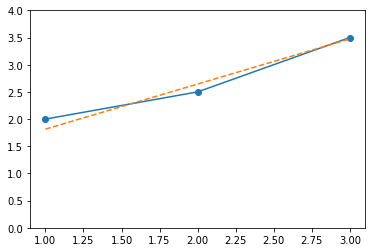

In [30]:
plt.plot(X,y, marker = 'o')
plt.plot(X,hypothesis, mfc = 'r', ls ="--")
plt.ylim(0,4)

## 63~70
- 텐서를 이용한 선형 회귀

In [32]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [34]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [36]:
# 독립변수
X = np.array([1, 2, 3],dtype = "float32")

# 종속변수
y = np.array([2, 2.5, 3.5], dtype = 'float32')

# 가중치
w = tf.Variable([2], dtype = "float32")

# 편향
b = tf.Variable([1], dtype = 'float32')

# 학습률
learning_rate = 0.1

In [ ]:
for i in range(1000):
  with tf.GradientTape() as tape:
    # 예측값
    hypothesis = w * X + b
    print("hypothesis:",hypothesis)

    # 오차
    cost = tf.reduce_mean(tf.square(hypothesis - y))
    print("cost:",cost)

  w_gred, b_gred = tape.gradient(cost, [w,b])
  print("w_gred : {}  b_gred : {}".format(w_gred, b_gred))

  # 가중치 업데이트
  w.assign_sub(w_gred * learning_rate)

  # Bias 업데이트
  b.assign_sub(b_gred * learning_rate)
  print("="*100)

In [40]:
print("i = {}, w = {},b = {}, cost ={}".format(i, w.numpy(), b.numpy(),cost))

i = 999, w = [0.7500009],b = [1.1666646], cost =0.01388890203088522


(0.0, 4.0)

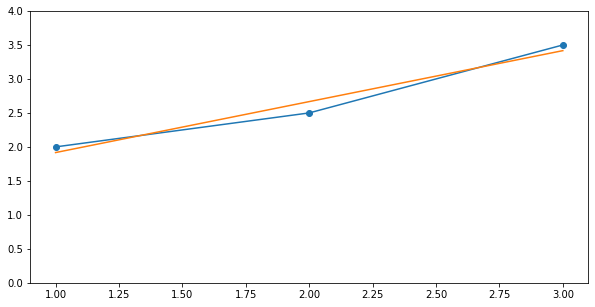

In [41]:
plt.figure(figsize = (10,5))
plt.plot(X,y ,marker = 'o')
plt.plot(X,hypothesis.numpy(), mfc = 'r', ls = "-")
plt.ylim(0,4)